In [13]:
import astropy.io
from astropy.io import fits
#import astroquery
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from io import StringIO 

Recreate Fig 10 (pg 37 from the annual review) with SSDS data

In [14]:
#SSDS galaxy data from: https://www.sdss3.org/dr8/spectro/galspec.php
#astropy.fits documentation: https://het.as.utexas.edu/HET/Software/Astropy-1.0/io/fits/index.html

#import fits data:

#galSpecInfo = fits.open('~/Downloads/galSpecInfo-dr8.fits',memmap=True)
#galSpecInfo
#Infocols = galSpecInfo[1].columns
#Infocols.names
#print(Infocols.names)
#SpecInfodata = galSpecInfo[1].data
#print(SpecInfodata)

#galSpecLine = fits.open('~/Downloads/galSpecLine-dr8.fits',memmap=True)
#Linecols = galSpecLine[1].columns
#Linecols.names
#print(Linecols.names)
#SDSSSpecLinedata = galSpecLine[1].data
#print(SpecLinedata)

#assign OIII, Hb, NII, Ha variables

#flux column names from https://data.sdss.org//datamodel/files/SPECTRO_REDUX/galSpecLine.html
#OIII = oiii_5007_flux 
#OIII = oiii_4959_flux
#OIII = oiii_flux
#Hbeta = h_beta_flux
#NII = nii_6584_flux 
#NII = nii_6548_flux 
#Halpha = h_alpha_flux

#OIII_SDSS = SDSSSpecLinedata['OIII_5007_FLUX']
#Hbeta_SDSS = SDSSSpecLinedata['H_BETA_FLUX']
#NII_SDSS = SDSSSpecLinedata['NII_6584_FLUX']
#Halpha_SDSS = SDSSSpecLinedata['H_ALPHA_FLUX']

#Math
x = np.log10((NII_SDSS/Halpha_SDSS))
y = np.log10((OIII_SDSS/Hbeta_SDSS))

#Plot
plt.scatter(x,y,s=0.0001, c='b', marker='.')
plt.xlim([-2,1])
plt.ylim([-1,1.5])
plt.xlabel("Log([NII]/Halpha)")
plt.ylabel("Log([OIII]/Hbeta)")
plt.show()




NameError: name 'NII_SDSS' is not defined

Figure 10 test with Andrew Battisti's SSDS DR7 data that considers S/N, and redshift. Also recreating Andrew's plots 

In [ ]:
# source paper: https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.4431B/abstract

# best fit line documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

#import dat files:
BattistiSpecLine = np.genfromtxt('SDSS_DR7_sfg_lines.dat', names=True)
BattistiSpecProp = np.genfromtxt('SDSS_DR7_sfg_prop.dat', names=True)
print(BattistiSpecProp.dtype.names)

#assign OIII, Hb, NII, Ha variables

#see column names:
print(BattistiSpecLine.dtype.names)
#OIII = OIII_5007 
#OIII = OIII_4959
#OIII = oiii
#Hbeta = Hb
#NII = NII_6584 
#NII = NII_6548 
#Halpha = 'Ha"

#OIII = BattistiSpecLine['oiii']
OIII = BattistiSpecLine['OIII_5007']
#print(OIII)
Hbeta = BattistiSpecLine['Hb']
NII = BattistiSpecLine['NII_6584']
#NII = BattistiSpecLine['NII_6548']
Halpha = BattistiSpecLine['Ha']
# Balmer optical depth, analogous to amount of dust 
Tau = BattistiSpecLine['tau']
logM_p50 = BattistiSpecProp['logM_p50']
#logM_p16 = BattistiSpecProp['logM_p16']
#logM_p84 = BattistiSpecProp['logM_p84']
# These already have +12 in the calculation
logOH_p50 = BattistiSpecProp['logOH_p50']
#logOH_p16 = BattistiSpecProp['logOH_p16']
#logOH_p84 = BattistiSpecProp['logOH_p84']
redshift = BattistiSpecProp['z']

# BPT diagram, Fig 10 plot
# Using Battisti et al data, which accounts for S/N, redshift, and no AGN branch
# The best fit line is not working for this one, but works for others. I wonder if this is a hint as to what the problem is.

#Math
x1 = np.log10((NII/Halpha))
y1 = np.log10((OIII/Hbeta))
fit1 = np.polyfit(x1, y1, 4)
p1 = np.poly1d(fit1)
t1 = np.linspace(-1, -0.4, 5000)
plt.plot(x1, y1, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')

#Plot
#plt.plot(x1,y1, '.')
#plt.plot(fit1,'-')
#plt.plot(x1, y1, '.', fit1,'-')#, xp, p30(xp), '--')
plt.xlabel("Log([NII]/Halpha)")
plt.ylabel("Log([OIII]/Hbeta)")
plt.xlim([-2,0])
plt.ylim([-1,1])
plt.show()

#Plot Balmer optical depth vs. log(Ha+NII / OIII)
# This was the finding from his paper

#Var
x2 = np.log((NII+Halpha)/OIII)
y2 = Tau

#Plot
#plt.scatter(x2,y2,fit2, c='b', marker='o')
fit2 = np.polyfit(x2, y2, 3)
p2 = np.poly1d(fit2)
t2 = np.linspace(-1, 4.5, 5000)
plt.plot(x2, y2, '.', t2, p2(t2), '-',markersize=1)
plt.xlabel("Log((Ha+[NII]) / [OIII])")
plt.ylabel("Balmer optical depth (Tau)")
plt.show()

#Plot Balmer optical depth vs. log(Mstar/Msolar)

#Variables
x3 = logM_p50
y3 = Tau

#Plot

#Plot with best fit line is broken, likely because of "bad" values in the dataset like NaNs or infinity. Could be that "fish tail".
#fit3 = np.polyfit(x3, y3, 1)
#p3 = np.poly1d(fit3)
#t3 = np.linspace(6, 11, 5000)
#plt.plot(x3, y3, '.', t3, p3(t3), '-',markersize=1)
plt.scatter(x3,y3,s=1, c='b', marker='o')
plt.xlabel("Log(Mstar/Msolar)")
plt.xlim([5,12])
plt.ylabel("Balmer optical depth (Tau)")
plt.show()


#Plot Balmer optical depth vs. log(12 + (O/H))
#This one matches the paper pretty well 
# I applied the coefficients to a graphing tool (highest degree first), and it worked!!
# \left(3.96882875\cdot10^{-03}\right)x^{3}+\ \left(3.31729989\cdot10^{-1}\right)x^{2}-\left(6.20640591\right)x^{1}+\left(002.64756412\cdot10\right)

#Variables
x4 = logOH_p50
y4 = Tau

#Plot
fit4 = np.polyfit(x4, y4, 3)
print(fit4)
p4 = np.poly1d(fit4)
t4 = np.linspace(8, 9.2, 5000)
plt.plot(x4, y4, '.', t4, p4(t4), '-',markersize=1)
#plt.scatter(x4,y4,s=1, c='b', marker='o')
plt.xlabel("Log((O/H))+12")
plt.xlim([7.5,9.5])
plt.ylabel("Balmer optical depth (Tau)")
plt.show()

#Plot Balmer optical depth vs. redshift

#Variables
x5 = redshift
y5 = Tau

#Plot
plt.scatter(x5,y5,s=1, c='b', marker='o')
plt.xlabel("z")
plt.xlim([0,0.2])
plt.ylabel("Balmer optical depth (Tau)")
plt.show()

#Plot Log([NII]/Halpha) vs. redshift
# if Log(nII/Ha) is a metallicity diagnostic, then I predict as z grows, metallicity shrinks

#Variables
x6 = redshift
y6 = np.log((NII/Halpha))

#Plot
plt.scatter(x6,y6,s=1, c='b', marker='o')
plt.xlabel("z")
plt.xlim([0,0.2])
plt.ylabel("Log([NII]/Halpha)")
plt.show()

#Plot metallicity vs. redshift

#Variables
#I think we want to log the ratio bc z is already logarithmic
x7 = redshift
y7 = logOH_p50

#Plot
plt.scatter(x7,y7,s=1, c='b', marker='o')
plt.xlabel("z")
plt.xlim([0,0.2])
plt.ylim([7.5,9.5])
plt.ylabel("Log((O/H))+12")
plt.show()

#Plot stellar mass vs. redshift
# Quite tight! That's exciting. This tells me that there is a trend between stellar mass of a galaxy and its redshift. As z grows, mass grows, but it tapers. I think we 
# did this in class actually. It looks like Hubble's Law, as redshift grows, recessional velocity grows, then tapers at higher redshifts.
# Has this been studied at higher redshifts? What is the theory behind this? Could it be that smaller mass galaxies are more visible to us at smaller redshift, while only
# massive galaxies are visible at high redshifts? (this is still a small range of z though).
# If there is a true mass trend, what does this mean? That there was more gas available in the past for more massive galaxy formation? Will this trend continue and galaxies
# will become generally smaller? Are galaxies still being formed, besides mergers? Doesn't this counter the theory that as time goes on, more mergers will occur, therefore 
# leading to fewer but more massive galaxies? 

#Variables
#I think we want to log the ratio bc z is already logarithmic
x7 = redshift
y7 = logM_p50

#Plot
plt.scatter(x7,y7,s=1, c='b', marker='o')
plt.xlabel("z")
#plt.xlim([0,0.2])
plt.ylim([5,12])
plt.ylabel("Log(Mstar/Msolar)")
plt.show()

Try fitting Auroral line data from Battisti to Fig 9. Modeling plots from pg 31 of Annual Review

In [ ]:
#see column names:
# Battisti corrected data, corrected for S/N, and redshift:
#print(BattistiSpecProp.dtype.names)
#print(BattistiSpecLine.dtype.names)

# SDSS data:
#print(Infocols.names)
#print(Linecols.names)

# all vals for OIII and NII:
#OIII = OIII_5007 
#OIII = OIII_4959
#OIII = oiii
#Hbeta = Hb
#NII = NII_6584 
#NII = NII_6548 
#Halpha = 'Ha"

#OIII = BattistiSpecLine['oiii']
OIII = BattistiSpecLine['OIII_5007']
#print(OIII)
Hbeta = BattistiSpecLine['Hb']
NII84 = BattistiSpecLine['NII_6584']
NII48 = BattistiSpecLine['NII_6548']
Halpha = BattistiSpecLine['Ha']
# Balmer optical depth, analogous to amount of dust 
Tau = BattistiSpecLine['tau']
logM_p50 = BattistiSpecProp['logM_p50']
#logM_p16 = BattistiSpecProp['logM_p16']
#logM_p84 = BattistiSpecProp['logM_p84']
# These already have +12 in the calculation
logOH_p50 = BattistiSpecProp['logOH_p50']
#logOH_p16 = BattistiSpecProp['logOH_p16']
#logOH_p84 = BattistiSpecProp['logOH_p84']
redshift = BattistiSpecProp['z']

x = logOH_p50  # metallicity

y1 = np.log10( (OIII/Hbeta) / (NII84/Halpha) )

plt.scatter(x,y1,s=0.1, c='b', marker='o')
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,4])
plt.ylabel("Log(R)")
plt.text(9,3,"R = O3N2")
plt.show()

y2 = np.log10( (OIII/Hbeta) / (NII84+Halpha) )

plt.scatter(x,y2,s=0.1, c='b', marker='o')
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-5,-1])
plt.ylabel("Log(R)")
plt.text(7.6,-4.5,"R = (O3/Hbeta)/(N2+Halpha)")
#plt.savefig("testfig1.pdf",format="pdf")
plt.show()


fig, axs = plt.subplots(4, 3)
# R = (O3/Hbeta)/(N2/Halpha)
axs[0, 0].plot(x, y1, '.',markersize=1)
axs[0, 0].set_title('R = O3N2')
axs[0, 0].set_xlim([7.5,9.5])
axs[0, 0].set_ylim([-2,8])
# R = (O3/Hbeta)/(N2+Halpha)
axs[0, 1].plot(x, y2, '.',markersize=1)
axs[0, 1].set_title('R = (O3/Hbeta)/(N2+Halpha)')
axs[0, 1].set_xlim([7.5,9.5])
axs[0, 1].set_ylim([-12,-2.5])
# R = 
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel="Log((O/H))+12", ylabel="Log(R)")
    ax.set_xlim([7.5, 9.2])
    ax.set_ylim([-2, 4])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


Try finding a 1:1 correlation between O3N2 vs O3/hb/(N2+Ha)

This would allow us to use the blended line N2+Ha at high redshift, and therefore infer the value of the O3N2 ratio, therefore infer the value of metallicity using log(O/H)+12

In [ ]:
# First, fit best fit lines to the O3N2 and (O3/Hbeta)/(N2+Halpha) plots
# Battisti data

x = logOH_p50

# O3N2
y1 = np.log10( (OIII/Hbeta) / (NII84/Halpha) )

fit1 = np.polyfit(x, y1, 3)
print(fit1)
p1 = np.poly1d(fit1)
t1 = np.linspace(8, 9.2, 5000)
plt.plot(x, y1, '.', t1, p1(t1), '-',markersize=1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,4])
plt.ylabel("Log(R)")
plt.text(9,3,"R = O3N2")
#plt.savefig("O3N2fig.pdf",format="pdf")
plt.show()

y2 = np.log10( (OIII/Hbeta) / (NII84+Halpha) )

fit2 = np.polyfit(x, y2, 3)
print(fit2)
p2 = np.poly1d(fit2)
t2 = np.linspace(8, 9.2, 5000)
plt.plot(x, y2, '.', t2, p2(t2), '-',markersize=1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-5,-1])
plt.ylabel("Log(R)")
plt.text(7.6,-4.5,"R = (O3/Hbeta)/(N2+Halpha)")
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


# Then, plot O3N2 vs (O3/Hbeta)/(N2+Halpha)
# Generally a 1:1, but is it because the ratios are so similar? Depend on H lines? 

y = y1
x = y2
fit3 = np.polyfit(x, y, 2)
print(fit3)
p3 = np.poly1d(fit3)
t3 = np.linspace(-4, -2, 5000)
plt.plot(x, y, '.', t3, p3(t3), '-',markersize=0.1)
plt.xlabel("Log(R)")
plt.xlim([-5,-1])
plt.ylim([-1,3])
plt.ylabel("Log(O3N2)")
#plt.text(-11.5,7,"R = (O3/Hbeta)/(N2+Halpha)")
#plt.savefig("O3N2 vs (OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


But if R = (O3/Hbeta)/(N2+Halpha), the units do not cancel. Try R = (O3+Hbeta)/(N2+Halpha)

In [ ]:
# First, fit best fit lines to the O3N2 and (O3/Hbeta)/(N2+Halpha) plots
# Battisti data

x = logOH_p50

# O3N2
y1 = np.log10( (OIII/Hbeta) / (NII84/Halpha) )

fit1 = np.polyfit(x, y1, 3)
print(fit1)
p1 = np.poly1d(fit1)
t1 = np.linspace(8, 9.2, 5000)
plt.plot(x, y1, '.', t1, p1(t1), '-',markersize=1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,4])
plt.ylabel("Log(R)")
plt.text(9,3,"R = O3N2")
#plt.savefig("O3N2fig.pdf",format="pdf")
plt.show()

y2 = np.log10( (OIII+Hbeta) / (NII84+Halpha) )

fit2 = np.polyfit(x, y2, 3)
print(fit2)
p2 = np.poly1d(fit2)
t2 = np.linspace(8, 9.2, 5000)
plt.plot(x, y2, '.', t2, p2(t2), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1.5,1])
plt.ylabel("Log(R)")
plt.text(7.6,-1,"R = (O3+Hbeta)/(N2+Halpha)")
plt.text(7.6,-1.25,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


# Then, plot O3N2 vs (O3/Hbeta)/(N2+Halpha)
# Generally a 1:1, but is it because the ratios are so similar? Depend on H lines? 

y = y1
x = y2
fit3 = np.polyfit(x, y, 2)
print(fit3)
p3 = np.poly1d(fit3)
t3 = np.linspace(-0.8, 0.25, 5000)
plt.plot(x, y, '.', t3, p3(t3), '-',markersize=0.1)
plt.xlabel("Log(R)")
plt.xlim([-1,0.5])
plt.ylim([-1,3])
plt.ylabel("Log(O3N2)")
plt.text(-0.9,2,"R = (O3+Hbeta)/(N2+Halpha)")
#plt.savefig("O3N2 vs (OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

But is this just a sanity check? 

Try overlaying data (SDSS DR8 and Battisti) on top of Pipit's new models

In [ ]:
# To do:
# Create model lines, one line per log(Q) column... for loop?
# Figure out the order of magnitudes issue... what is Pipit working from? 

# Pull in Pipit's model:
TrianiModel = np.genfromtxt('HaNII.txt', names=True)
print(TrianiModel.dtype.names)

# Triani model values
logOH12_Tmod = TrianiModel['12logOH']
O3N2_Tmod = TrianiModel['O3N2']
O3N2Ha_Tmod = TrianiModel['O3N2Ha']
#print(logOH12_mod)

# Battisti data values
#OIII = BattistiSpecLine['oiii']
OIII_Batt = BattistiSpecLine['OIII_5007']
#print(OIII)
Hbeta_Batt = BattistiSpecLine['Hb']
NII84_Batt = BattistiSpecLine['NII_6584']
#NII48 = BattistiSpecLine['NII_6548']
Halpha_Batt = BattistiSpecLine['Ha']
# Balmer optical depth, analogous to amount of dust 
#Tau = BattistiSpecLine['tau']
#logM_p50 = BattistiSpecProp['logM_p50']
#logM_p16 = BattistiSpecProp['logM_p16']
#logM_p84 = BattistiSpecProp['logM_p84']
# These already have +12 in the calculation
#logOH_p16 = BattistiSpecProp['logOH_p16']
#logOH_p84 = BattistiSpecProp['logOH_p84']
#redshift = BattistiSpecProp['z']

# Battisti variables
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
O3N2_Batt = np.log10( (OIII_Batt/Hbeta_Batt) / (NII84_Batt/Halpha_Batt) )
O3N2Ha_Batt = np.log10( (OIII_Batt/Hbeta_Batt) / (NII84_Batt+Halpha_Batt) )

# SDSS data values

#galSpecLine = fits.open('~/Downloads/galSpecLine-dr8.fits',memmap=True)
Linecols = galSpecLine[1].columns
Linecols.names
#print(Linecols.names)
SDSSSpecLinedata = galSpecLine[1].data

galSpecExtra = fits.open('~/Downloads/galSpecExtra-dr8.fits',memmap=True)
Linecols2 = galSpecExtra[1].columns
Linecols2.names
print(Linecols2.names)
SDSSSpecExtradata = galSpecExtra[1].data

#assign OIII, Hb, NII, Ha variables
#flux column names from https://data.sdss.org//datamodel/files/SPECTRO_REDUX/galSpecLine.html
### UNITS ### 10-17 erg cm-2 s-1
#OIII_SDSS = oiii_5007_flux 
#OIII = oiii_4959_flux
#OIII = oiii_flux
#Hbeta = h_beta_flux
#NII_SDSS = nii_6584_flux 
#NII = nii_6548_flux 
#Halpha = h_alpha_flux

OIII_SDSS = SDSSSpecLinedata['OIII_5007_FLUX']
Hbeta_SDSS = SDSSSpecLinedata['H_BETA_FLUX']
NII_SDSS = SDSSSpecLinedata['NII_6584_FLUX']
Halpha_SDSS = SDSSSpecLinedata['H_ALPHA_FLUX']
# From galspecextra site: The median estimate of the Oxygen abundance derived using Charlot & Longhetti models. The values are 
# reported as 12 + Log O/H. See Tremonti et al (2004) and Brinchmann et al (2004) for details. 
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']

# SDSS variables
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']
O3N2_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS/Halpha_SDSS) )
O3N2Ha_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS+Halpha_SDSS)  )

# Overlay O3N2 vs metallicity model and data
plt.plot(logOH12_Tmod,O3N2_Tmod, 'o', OH_P50_SDSS,O3N2_SDSS,'.', markersize=1) 
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,6])
plt.ylabel("Log(R)")
plt.text(9,5,"R = (O3/N2)")
plt.text(9,5.5,"SDSS DR8")
#plt.savefig("O3N2 vs metal Triani model and Battisti data.pdf",format="pdf")
plt.show()

# Overlay O3N2 vs metallicity model and data
plt.plot(logOH12_Tmod,O3N2_Tmod, 'o', logOH_p50_Batt, O3N2_Batt,'.', markersize=1) 
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,6])
plt.ylabel("Log(R)")
plt.text(9,5,"R = (O3/N2)")
plt.text(9,5.6,"Battisti")
#plt.savefig("O3N2 vs metal Triani model and Battisti data.pdf",format="pdf")
plt.show()

# Overlay O3N2Ha vs metallicity model and data
plt.plot(logOH12_Tmod, O3N2Ha_Tmod,'o',OH_P50_SDSS,O3N2Ha_SDSS,'.',markersize=1) 
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-6,2])
plt.ylabel("Log(R)")
plt.text(8.5,1,"R = (O3/Hbeta)/(N2+Halpha)")
#plt.savefig("O3N2+Ha vs metal Triani model and Battisti data.pdf",format="pdf")
plt.show()

# Overlay O3N2Ha vs metallicity model and data
plt.plot(logOH12_Tmod, O3N2Ha_Tmod,'o', logOH_p50_Batt, O3N2Ha_Batt,'.',markersize=1) 
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-6,2])
plt.ylabel("Log(R)")
plt.text(8.5,1,"R = (O3/Hbeta)/(N2+Halpha)")
#plt.savefig("O3N2+Ha vs metal Triani model and Battisti data.pdf",format="pdf")
plt.show()


# Data still does not match models. Try sanity check with BPT plot:

#SDSS Data
x = np.log10((NII_SDSS/Halpha_SDSS))
y = np.log10((OIII_SDSS/Hbeta_SDSS))
#Plot
plt.scatter(x,y,s=0.0001, c='b', marker='.')
plt.xlim([-2,1])
plt.ylim([-1,1.5])
plt.xlabel("Log([NII]/Halpha)")
plt.ylabel("Log([OIII]/Hbeta)")
plt.show()

# Looks good....

#Battisti Data (should just see star formation branch)
x = np.log10((NII84_Batt/Halpha_Batt))
y = np.log10((OIII_Batt/Hbeta_Batt))
#Plot
plt.scatter(x,y,s=0.0001, c='b', marker='.')
plt.xlim([-2,1])
plt.ylim([-1,1.5])
plt.xlabel("Log([NII]/Halpha)")
plt.ylabel("Log([OIII]/Hbeta)")
plt.show()

# Looks good...


Explore other ratios involving Hb, OIII, and Ha+NII
For Low-Resolution Spectra

In [15]:
# See this google doc for further context:
# https://docs.google.com/document/d/1Oo44kBQVfmuIUjhzNCpzn1Fku9fEpX672kxPGejz89Y/edit?usp=sharing

# Battisti data values
OIII_Batt = BattistiSpecLine['OIII_5007']
Hbeta_Batt = BattistiSpecLine['Hb']
NII84_Batt = BattistiSpecLine['NII_6584']
Halpha_Batt = BattistiSpecLine['Ha']
logOH_p50_Batt = BattistiSpecProp['logOH_p50']

# SDSS data values
#galSpecLine = fits.open('~/Downloads/galSpecLine-dr8.fits',memmap=True)
Linecols = galSpecLine[1].columns
Linecols.names
#print(Linecols.names)
SDSSSpecLinedata = galSpecLine[1].data

galSpecExtra = fits.open('~/Downloads/galSpecExtra-dr8.fits',memmap=True)
Linecols2 = galSpecExtra[1].columns
Linecols2.names
#print(Linecols2.names)
SDSSSpecExtradata = galSpecExtra[1].data

OIII_SDSS = SDSSSpecLinedata['OIII_5007_FLUX']
Hbeta_SDSS = SDSSSpecLinedata['H_BETA_FLUX']
NII_SDSS = SDSSSpecLinedata['NII_6584_FLUX']
Halpha_SDSS = SDSSSpecLinedata['H_ALPHA_FLUX']
# From galspecextra site: The median estimate of the Oxygen abundance derived using Charlot & Longhetti models. The values are 
# reported as 12 + Log O/H. See Tremonti et al (2004) and Brinchmann et al (2004) for details. 
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']

# SDSS variables
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']
O3N2_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS/Halpha_SDSS) )
O3N2Ha_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS+Halpha_SDSS)  )

## OIII / Ha+NII vs metallicity

# Battisti variables
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
O3_HaN2_Batt = np.log10( OIII_Batt / (NII84_Batt+Halpha_Batt) )
HaN2_O3_Batt = np.log10( (NII84_Batt+Halpha_Batt) / OIII_Batt)
Hb_HaN2_Batt = np.log10( Hbeta_Batt / (NII84_Batt+Halpha_Batt) )
OIIIHaN2_Hb_Batt = np.log10((OIII_Batt+NII84_Batt+Halpha_Batt)/Hbeta_Batt )
OIII_HbHaN2_Batt = np.log10(OIII_Batt/(Hbeta_Batt+NII84_Batt+Halpha_Batt) )
HbHaN2_OIII_Batt = np.log10((Hbeta_Batt+NII84_Batt+Halpha_Batt) / OIII_Batt )
OIIIHb_HaN2_Batt = np.log10((Hbeta_Batt+OIII_Batt)/(NII84_Batt+Halpha_Batt) )
HaN2_OIIIHb_Batt = np.log10((NII84_Batt+Halpha_Batt)/(Hbeta_Batt+OIII_Batt) )

x = logOH_p50_Batt
y1 = O3_HaN2_Batt

fit1 = np.polyfit(x, y1, 3)
print(fit1)
p1 = np.poly1d(fit1)
t1 = np.linspace(8.1, 9.2, 5000)
plt.plot(x, y1, '.', t1, p1(t1), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,1])
plt.ylabel("Log(R)")
plt.text(7.6,-1,"R = O3/(N2+Halpha)")
plt.text(7.6,-1.25,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

x = logOH_p50_Batt
y1b = HaN2_O3_Batt

fit1b = np.polyfit(x, y1b, 3)
print(fit1b)
p1b = np.poly1d(fit1b)
t1b = np.linspace(8.1, 9.2, 5000)
plt.plot(x, y1b, '.', t1b, p1b(t1b), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-0.5,2])
plt.ylabel("Log(R)")
plt.text(7.6,1.5,"R = (N2+Halpha)/O3")
plt.text(7.6,1.25,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## Hb / Ha+NII vs metallicity

x = logOH_p50_Batt
y2 = Hb_HaN2_Batt

fit2 = np.polyfit(x, y2, 3)
print(fit2)
p2 = np.poly1d(fit2)
t2 = np.linspace(8.1, 9.2, 5000)
plt.plot(x, y2, '.', t2, p2(t2), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([0,-1.5])
plt.ylabel("Log(R)")
plt.text(7.6,-1,"R = Hb/(N2+Halpha)")
plt.text(7.6,-1.25,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


## OIII + H⍺+NII / H𝛽  vs. metallicity

x = logOH_p50_Batt
y3 = OIIIHaN2_Hb_Batt

fit3 = np.polyfit(x, y3, 3)
print(fit3)
p3 = np.poly1d(fit3)
t3= np.linspace(8.1, 9.2, 5000)
plt.plot(x, y3, '.', t3, p3(t3), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([0.4,1.2])
plt.ylabel("Log(R)")
plt.text(7.6,1.1,"R = (O3 + H⍺+N2) / Hb")
plt.text(7.6,1,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## OIII / H𝛽 + H⍺+NII

x = logOH_p50_Batt
y4 = OIII_HbHaN2_Batt

fit4 = np.polyfit(x, y4, 3)
print(fit4)
p4 = np.poly1d(fit4)
t4= np.linspace(8.1, 9.2, 5000)
plt.plot(x, y4, '.', t4, p4(t4), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,0.5])
plt.ylabel("Log(R)")
plt.text(7.6,-1,"R = O3 / (Hb+H⍺+N2)")
plt.text(7.6,-1.2,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## H𝛽 + H⍺+NII / OIII 

x = logOH_p50_Batt
y4b = HbHaN2_OIII_Batt

fit4b = np.polyfit(x, y4b, 3)
print(fit4b)
p4b = np.poly1d(fit4b)
t4b= np.linspace(8.1, 9.2, 5000)
plt.plot(x, y4b, '.', t4b, p4b(t4b), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-0.5,2])
plt.ylabel("Log(R)")
plt.text(7.6,1,"R = (Hb+H⍺+N2) / O3")
plt.text(7.6,0.8,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## H⍺+NII / OIII+H𝛽 

x = logOH_p50_Batt
y5 = OIIIHb_HaN2_Batt

fit5 = np.polyfit(x, y5, 3)
print(fit5)
p5 = np.poly1d(fit5)
t5= np.linspace(8.1, 9.2, 5000)
plt.plot(x, y5, '.', t5, p5(t5), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1,0.5])
plt.ylabel("Log(R)")
plt.text(7.6,-0.5,"R = (O3+Hb) / (H⍺+N2)")
plt.text(7.6,-0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## OIII+H𝛽 / H⍺+NII

x = logOH_p50_Batt
y5b = HaN2_OIIIHb_Batt

fit5b = np.polyfit(x, y5b, 3)
print(fit5b)
p5b = np.poly1d(fit5b)
t5b= np.linspace(8.1, 9.2, 5000)
plt.plot(x, y5b, '.', t5b, p5b(t5b), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-0.4,1])
plt.ylabel("Log(R)")
plt.text(7.6,0.8,"R = (H⍺+N2)/(O3+Hb)")
plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()



NameError: name 'galSpecLine' is not defined

Explore other ratios involving Hb, OIII, and Ha+NII, and SII.
For High-Resolution Spectra

In [16]:
# See this google doc for further context:
# https://docs.google.com/document/d/1Oo44kBQVfmuIUjhzNCpzn1Fku9fEpX672kxPGejz89Y/edit?usp=sharing

# Battisti data values
OIII_Batt = BattistiSpecLine['OIII_5007']
Hbeta_Batt = BattistiSpecLine['Hb']
NII84_Batt = BattistiSpecLine['NII_6584']
Halpha_Batt = BattistiSpecLine['Ha']
SII17_Batt = BattistiSpecLine['SII_6717']
SII31_Batt = BattistiSpecLine['SII_6731']
SII_Batt = SII31_Batt + SII17_Batt
HaNII_Batt = NII84_Batt + Halpha_Batt
logOH_p50_Batt = BattistiSpecProp['logOH_p50']

# SDSS data values
#galSpecLine = fits.open('~/Downloads/galSpecLine-dr8.fits',memmap=True)
Linecols = galSpecLine[1].columns
Linecols.names
#print(Linecols.names)
SDSSSpecLinedata = galSpecLine[1].data

galSpecExtra = fits.open('~/Downloads/galSpecExtra-dr8.fits',memmap=True)
Linecols2 = galSpecExtra[1].columns
Linecols2.names
#print(Linecols2.names)
SDSSSpecExtradata = galSpecExtra[1].data

OIII_SDSS = SDSSSpecLinedata['OIII_5007_FLUX']
Hbeta_SDSS = SDSSSpecLinedata['H_BETA_FLUX']
NII_SDSS = SDSSSpecLinedata['NII_6584_FLUX']
Halpha_SDSS = SDSSSpecLinedata['H_ALPHA_FLUX']
SII17_SDSS = SDSSSpecLinedata['SII_6717_FLUX']
SII31_SDSS = SDSSSpecLinedata['SII_6731_FLUX']
SII_SDSS = SII17_SDSS + SII31_SDSS
HaNII_SDSS = Halpha_SDSS + NII_SDSS
# From galspecextra site: The median estimate of the Oxygen abundance derived using Charlot & Longhetti models. The values are 
# reported as 12 + Log O/H. See Tremonti et al (2004) and Brinchmann et al (2004) for details. 
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']


# Battisti variables
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
SII_HaNII_Batt = np.log10( SII_Batt / HaNII_Batt )
HaNII_SII_Batt = np.log10( HaNII_Batt / SII_Batt )
OIIIHb_HaNIISII_Batt = np.log10( (OIII_Batt + Hbeta_Batt) / (HaNII_Batt+SII_Batt) )
SII_OIII_Batt = np.log10( SII_Batt / OIII_Batt )
OIII_SII_Batt = np.log10( OIII_Batt/ SII_Batt)
Hb_SII_Batt = np.log10( Hbeta_Batt / SII_Batt )
SII_Hb_Batt = np.log10( SII_Batt / Hbeta_Batt  )

# SDSS variables
OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']


# log(SII/ NII+Ha) vs. Metallicity

x = logOH_p50_Batt
y1 = SII_HaNII_Batt

fit1 = np.polyfit(x, y1, 6)
print(fit1)
p1 = np.poly1d(fit1)
t1 = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y1, '.', t1, p1(t1), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1.5,0])
plt.ylabel("Log(R)")
plt.text(7.6,-1.1,"R = S2/(N2+Halpha)")
plt.text(7.6,-1.25,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## log( NII+Ha  /SII) vs. Metallicity

x = logOH_p50_Batt
y2 = HaNII_SII_Batt

fit2 = np.polyfit(x, y2, 6)
print(fit2)
p2 = np.poly1d(fit2)
t2 = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y2, '.', t2, p2(t2), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([0,1.5])
plt.ylabel("Log(R)")
plt.text(7.6,1.4,"R = (N2+Halpha)/S2")
plt.text(7.6,1.3,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# log (OIII+H𝛽 / H⍺+NII+SII) vs metallicity

x = logOH_p50_Batt
y3 = OIIIHb_HaNIISII_Batt

fit3 = np.polyfit(x, y3, 6)
print(fit3)
p3 = np.poly1d(fit3)
t3 = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y3, '.', t3, p3(t3), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1.25,0.4])
plt.ylabel("Log(R)")
plt.text(7.6,-0.8,"R = (O3+Hb)/ (H⍺+N2+S2)")
plt.text(7.6,-0.9,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


# log SII/OIII vs metallicity

x = logOH_p50_Batt
y4 = SII_OIII_Batt

fit4 = np.polyfit(x, y4, 6)
print(fit4)
p4 = np.poly1d(fit4)
t4 = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y4, '.', t4, p4(t4), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1.25,1])
plt.ylabel("Log(R)")
plt.text(7.6,0.75,"R = S2/O3")
plt.text(7.6,0.6,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# log OIII/SII vs metallicity

x = logOH_p50_Batt
y4b = OIII_SII_Batt

fit4b = np.polyfit(x, y4b, 6)
print(fit4b)
p4b = np.poly1d(fit4b)
t4b = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y4b, '.', t4b, p4b(t4b), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1.25,1.4])
plt.ylabel("Log(R)")
plt.text(7.6,-0.5,"R = O3/S2")
plt.text(7.6,-0.6,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# log Hb/SII vs metallicity

x = logOH_p50_Batt
y5 = Hb_SII_Batt

fit5 = np.polyfit(x, y5, 6)
print(fit5)
p5 = np.poly1d(fit5)
t5 = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y5, '.', t5, p5(t5), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-0.6,0.6])
plt.ylabel("Log(R)")
plt.text(7.6,-0.5,"R = Hb/S2")
plt.text(7.6,-0.55,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# log SII/Hb vs metallicity

x = logOH_p50_Batt
y5b = SII_Hb_Batt

fit5b = np.polyfit(x, y5b, 6)
print(fit5b)
p5b = np.poly1d(fit5b)
t5b = np.linspace(8.2, 9.2, 5000)
plt.plot(x, y5b, '.', t5b, p5b(t5b), '-',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-0.6,0.6])
plt.ylabel("Log(R)")
plt.text(7.6,-0.5,"R = S2/Hb")
plt.text(7.6,-0.55,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()



NameError: name 'galSpecLine' is not defined

Kewley et al 19 models, figure 9

In [ ]:
# Extracted from the tables on page 52 of the annual review

# Kewley 19 O3N2

#x = log(R) # y axis
# Maybe [-2,3] like the plots ? but what is thought process...
x = np.arange(-2, 3, 0.05) # log(O3N2)
y = [-3.98,-3.73,-3.48,-3.23,-2.98,-2.73,-2.48,-2.23,-1.98] # log(U) values
plt.subplot(111)
for i in y:
    z = 10.312 -(1.6575*x) + 2.2525*i - (1.3594*i*x) +0.4764*(x**2) + 1.173*(i**2) - (0.2968*x*(i**2)) +0.1974*i*(x**2) - (0.0544*(x**3)) +0.1891*(i**3) # metallicity, x axis   
    #print(z)
    plt.plot(z,x,'-')
    plt.legend(i)
# Battisti variables
#logOH_p50_Batt = BattistiSpecProp['logOH_p50']
#O3N2_Batt = np.log10( (OIII_Batt/Hbeta_Batt) / (NII84_Batt/Halpha_Batt) )
# SDSS variables
#OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']
#O3N2_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS/Halpha_SDSS) )
plt.plot(logOH_p50_Batt,O3N2_Batt,'.',color='b',markersize=.1)
#plt.plot(OH_P50_SDSS,O3N2_SDSS,'.',color='k',markersize=.1)
plt.xlim([7.6,9.3])
plt.ylim([-2,3])
plt.xlabel("Log(O/H)+12")
plt.ylabel("Log(R)")
plt.text(7.6,-1,"R = O3N2")




('RA', 'DEC', 'z', 'OII_3726', 'OII_3726_err', 'OII_3729', 'OII_3729_err', 'Hb', 'Hb_err', 'OIII_4959', 'OIII_4959_err', 'OIII_5007', 'OIII_5007_err', 'NII_6548', 'NII_6548_err', 'Ha', 'Ha_err', 'NII_6584', 'NII_6584_err', 'SII_6717', 'SII_6717_err', 'SII_6731', 'SII_6731_err', 'oii', 'oiii', 'ha_nii', 'tau', 'EW_ha', 'EW_ha_err')

In [17]:
# Kewley 19 R32

OII3727_Batt = BattistiSpecLine['OII_3726']
OIII4959_Batt = BattistiSpecLine['OIII_4959']
R23_Batt = np.log10((OII3727_Batt+OIII4959_Batt+OIII5007_Batt)/Hbeta_Batt)

#x = log(R) # y axis
# Maybe [-2,3] like the plots ? but what is thought process...
x = np.arange(-2, 3, 0.05) # log(O3N2)
y = [-3.98,-3.73,-3.48,-3.23,-2.98,-2.73,-2.48,-2.23,-1.98] # log(U) values
# try making it an arange
# OR try y = the output of o3o2
# use d16 as an initial metallicity 
plt.subplot(111)
for i in y:
    z = 9.7757 -(0.5059*x) + 0.9707*i - (0.1744*i*x) -0.0255*(x**2) + 0.3838*(i**2) - (0.0378*x*(i**2)) +0.0806*i*(x**2) - (0.0852*(x**3)) +0.0462*(i**3) # metallicity, x axis   
    #print(z)
    plt.plot(z,x,'-')
# o3o2, find coeff, iterate between o3o2 and metallicity. 
# 
    
# Battisti variables
#logOH_p50_Batt = BattistiSpecProp['logOH_p50']
#O3N2_Batt = np.log10( (OIII_Batt/Hbeta_Batt) / (NII84_Batt/Halpha_Batt) )
# SDSS variables
#OH_P50_SDSS =  SDSSSpecExtradata['OH_P50']
#O3N2_SDSS = np.log10( (OIII_SDSS/Hbeta_SDSS) / (NII_SDSS/Halpha_SDSS) )
#plt.plot(logOH_p50_Batt,R23_Batt,'.',color='b',markersize=.1)
#plt.plot(OH_P50_SDSS,O3N2_SDSS,'.',color='k',markersize=.1)
plt.xlim([7.5,9.3])
plt.ylim([-1,1.5])
plt.xlabel("Log(O/H)+12")
plt.ylabel("Log(R)")
plt.text(7.7,-0.5,"R = R23")

# Model doesn't look right
# But data fits the model in the paper well
# Makes sense too to see a denser distribution at higher metallicities if we assume that closer/younger galaxies are more metal
# rich and easier to observe

NameError: name 'OIII5007_Batt' is not defined

/tmp/ipykernel_1175398/3692464725.py:7: RuntimeWarning: divide by zero encountered in divide
  N2S2_Batt = np.log10((NII84_Batt)/((SII_6717_Batt +SII_6731_Batt)/2) )
/tmp/ipykernel_1175398/3692464725.py:7: RuntimeWarning: invalid value encountered in log10
  N2S2_Batt = np.log10((NII84_Batt)/((SII_6717_Batt +SII_6731_Batt)/2) )


Text(7.9, -0.8, 'R = NII/SII')

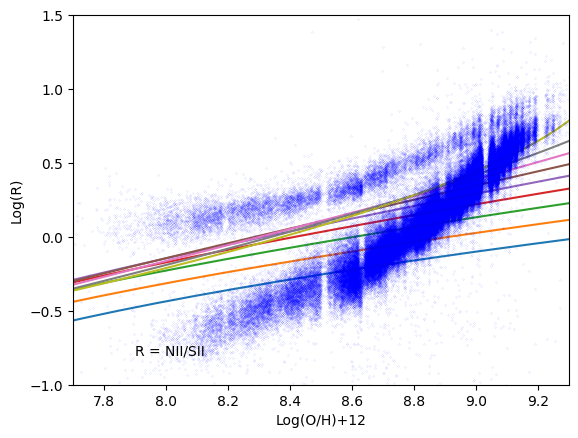

In [18]:
# Kewley 19 NII / SII

# Battisti variables
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
SII_6717_Batt = BattistiSpecLine['OII_3726']
SII_6731_Batt = BattistiSpecLine['SII_6731']
N2S2_Batt = np.log10((NII84_Batt)/((SII_6717_Batt +SII_6731_Batt)/2) )

# Kewley 19 model from table 
#x = log(R) # y axis
# Maybe [-2,3] like the plots ? but what is thought process...
x = np.arange(-2, 3, 0.05) # log(O3N2)
y = [-3.98,-3.73,-3.48,-3.23,-2.98,-2.73,-2.48,-2.23,-1.98] # log(U) values
plt.subplot(111)
for i in y:
         #A       #B         #C          #D           #E             #F                #G                 #H                #I              #J
    z = 5.8892 + 3.1688*x - 3.5991*i + (1.6394*i*x) -2.3939*(x**2) - 1.6764*(i**2) + (0.4455*x*(i**2)) -0.9302*i*(x**2) - (0.0966*(x**3)) -0.2490*(i**3) # metallicity, x axis   
    #print(z)
    plt.plot(z,x,'-')

plt.plot(logOH_p50_Batt,N2S2_Batt,'.',color='b',markersize=.1)
#plt.plot(OH_P50_SDSS,O3N2_SDSS,'.',color='k',markersize=.1)
plt.xlim([7.7,9.3])
plt.ylim([-1,1.5])
plt.xlabel("Log(O/H)+12")
plt.ylabel("Log(R)")
plt.text(7.9,-0.8,"R = NII/SII")